In [ ]:
from experiment import Experiment

/home/sebidom/miniforge3/envs/gfnenv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/sebidom/miniforge3/envs/gfnenv/lib/python3.12/site-packages/torchani/__init__.py:59: UserWarning: Dependency not satisfied, torchani.ase will not be available
  warnings.warn("Dependency not satisfied, torchani.ase will not be available")


In [2]:
# TODO: fix half precision
config = {
      "general" : {
         "device": "cuda",
         "float_precision": 32,
         "path_to_data": "/home/sebidom/dom/manifold_contgfn/manifold-gfn/dipeptides_smiles.hdf5",
         "T" : 1000,
      },
      "proxy" : {
         "model": "ANI2x",
         "skip_setup": False,
         "normalise": True, 
         "clamp": True,
         "remove_outliers": True,
         "n_samples": 10000,
         "max_energy": -2495.3022,
         "min_energy": -2501.4858,
         "max_batch_size": 2500,
      },
      "env" : {
         "single_molecule": True,
         "molecule_name": "alanine_dipeptide",
         "molecule_id": 0,
         "remove_hydrogens": True,
         "n_comp": 5,
         "traj_length": 7,
         "encoding_multiplier": 5,
         "vonmises_max_log_conc": 7,
         "vonmises_min_log_conc": 1,
         "backbone_only": True,
      },
      "forward_policy" : {
         "n_hid": 512,
         "n_layers": 5,
      },
      "backward_policy" : {
         "uniform": False,
         "n_hid": 512,
         "n_layers": 5,
      },
      "optimizer_config" : {
         "loss": "trajectorybalance",
         "lr": 0.0001,
         "lr_z_mult": 10,
         "lr_decay_period": 5000,
         "lr_decay_gamma": 0.9,
         "z_dim": 16,
         "initial_z_scaling": 25.0,
         "method": "adam",
         "early_stopping": 0.0,
         "adam_beta1": 0.9,
         "adam_beta2": 0.999,
         "clip_value": 1e-4,
         "steps_per_batch": 3,
         "gradient_clipping": True,
      },
      "gflownet" : {
         "regular_capacity": 1000,
         "priority_capacity": 1000,
         "priority_ratio": 0.8,
         "log_reward_min": -30,
         "batch_size": {
            "forward": 80,
            "replay": 20,
         },
      },
      "logging" : {
          "log_directory": "/home/sebidom/dom/manifold_contgfn/manifold-gfn/logs",
          "log_interval": 50000,
          "checkpoint_interval": 10000,
          "visualisation_interval": 500, 
          "checkpoints": True,
          "n_uniform_samples": 100000,
          "n_onpolicy_samples": 20000,
          "n_visualisation_samples": 5000,
          "num_bins": 10,
          "num_samples_per_cell": 5,
      }
}

In [3]:
exp = Experiment(config=config)

Initialising new experiment using provided config
/home/sebidom/miniforge3/envs/gfnenv/lib/python3.12/site-packages/torchani/resources/
beta: 315.7750411028582
Setting up proxy
Estimated min energy: -495.6942138671875
Estimated max energy: -494.0369873046875
Proxy set up
Initialised molecule CC(=O)N[C@@H](C)C(=O)NC
Number of torsion angles: 4
Encoding multiplier: 5
Mixture dimension: 5


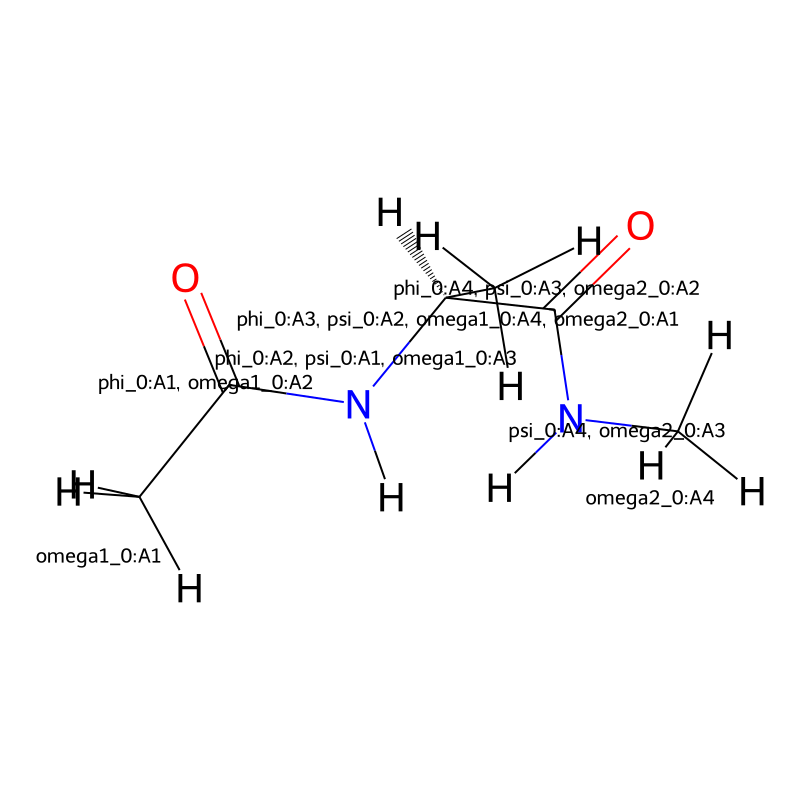

In [4]:
exp.env.torsion_angles

exp.visualise_molecule_2D()

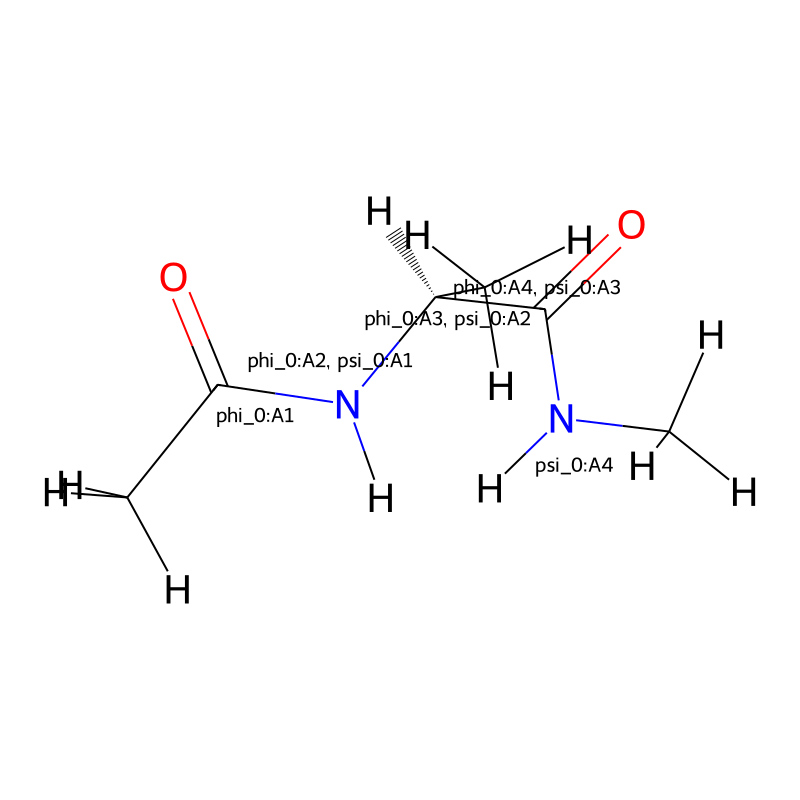

In [4]:
exp.visualise_molecule_2D()

In [ ]:
exp.train(50000)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: dominicp6. Use `wandb login --relogin` to force relogin


Ground truth density already computed. Loading from file.


Loss: 1477.037, logZ: 20.817, lr: 1.000e-04:   0%|          | 92/50000 [00:26<4:01:42,  3.44it/s]


KeyboardInterrupt: 

wandb: WARNING Fatal error while uploading data. Some run data will not be synced, but it will still be written to disk. Use `wandb sync` at the end of the run to try uploading.
